<a href="https://colab.research.google.com/github/anidaniel/NASDAQ-Apple-stock/blob/master/acnologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
# PROJECT ACNOLOGIA

In [0]:
# Description: This program predicts the price of AAPL stock for a specific day
#              using the Machine Learning algorithm called Support Vector Regression (SVR)
#              & Linear Regression.

In [0]:
#Import the libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [25]:
#Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab
df = pd.read_csv('stockaapl.csv')
df.head(7)

Saving stockaapl.csv to stockaapl.csv


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-01,225.070007,228.220001,224.199997,224.589996,224.589996,34805800
1,2019-10-02,223.059998,223.580002,217.929993,218.960007,218.960007,34612300
2,2019-10-03,218.429993,220.960007,215.130005,220.820007,220.820007,28606500
3,2019-10-04,225.639999,227.490005,223.889999,227.009995,227.009995,34619700
4,2019-10-07,226.270004,229.929993,225.839996,227.059998,227.059998,30576500
5,2019-10-08,225.820007,228.059998,224.330002,224.399994,224.399994,27955000
6,2019-10-09,227.029999,227.789993,225.639999,227.029999,227.029999,18692600


In [0]:
#Create the lists / X and Y data sets
dates = []
prices = []

In [27]:
#Get the number of rows and columns in the data set
df.shape

(22, 7)

In [28]:
#Get the last row of data (this will be the data that we test on)
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
21,2019-10-30,244.759995,245.300003,241.210007,243.259995,243.259995,30950600


In [29]:
#Get all of the data except for the last row
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-01,225.070007,228.220001,224.199997,224.589996,224.589996,34805800
1,2019-10-02,223.059998,223.580002,217.929993,218.960007,218.960007,34612300
2,2019-10-03,218.429993,220.960007,215.130005,220.820007,220.820007,28606500
3,2019-10-04,225.639999,227.490005,223.889999,227.009995,227.009995,34619700
4,2019-10-07,226.270004,229.929993,225.839996,227.059998,227.059998,30576500
5,2019-10-08,225.820007,228.059998,224.330002,224.399994,224.399994,27955000
6,2019-10-09,227.029999,227.789993,225.639999,227.029999,227.029999,18692600
7,2019-10-10,227.929993,230.440002,227.300003,230.089996,230.089996,28253400
8,2019-10-11,232.949997,237.639999,232.309998,236.210007,236.210007,41698900
9,2019-10-14,234.899994,238.130005,234.669998,235.869995,235.869995,24106900


In [30]:
#The new shape of the data
df.shape

(21, 7)

In [0]:
#Get all of the rows from the Date Column
df_dates = df.loc[:, 'Date']
#Get all of the rows from the Open Column
df_open = df.loc[:, 'Open']

In [0]:
#Create the independent data set X
for date in df_dates:
  dates.append( [int(date.split('-')[2])])
  
#Create the dependent data se 'y'
for open_price in df_open:
  prices.append(float(open_price))

In [33]:
#See what days were recorded
print(dates)

[[1], [2], [3], [4], [7], [8], [9], [10], [11], [14], [15], [16], [17], [18], [21], [22], [23], [24], [25], [28], [29]]


In [0]:
def predict_prices(dates, prices, x):
  
  #Create the 3 Support Vector Regression models
  svr_lin = SVR(kernel='linear', C= 1e3)
  svr_poly= SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
  
  #Train the SVR models 
  svr_lin.fit(dates,prices)
  svr_poly.fit(dates,prices)
  svr_rbf.fit(dates,prices)
  
  #Create the Linear Regression model
  lin_reg = LinearRegression()
  #Train the Linear Regression model
  lin_reg.fit(dates,prices)
  
  #Plot the models on a graph to see which has the best fit
  plt.scatter(dates, prices, color='black', label='Data')
  plt.plot(dates, svr_rbf.predict(dates), color='red', label='SVR RBF')
  plt.plot(dates, svr_poly.predict(dates), color='blue', label='SVR Poly')
  plt.plot(dates, svr_lin.predict(dates), color='green', label='SVR Linear')
  plt.plot(dates, lin_reg.predict(dates), color='orange', label='Linear Reg')
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.title('Regression')
  plt.legend()
  plt.show()
  
  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0],svr_poly.predict(x)[0],lin_reg.predict(x)[0]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


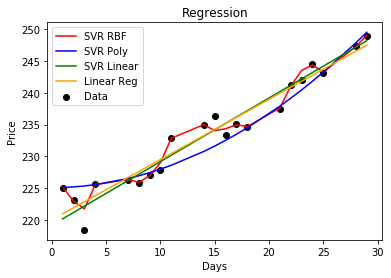

(246.2747129116121, 249.21313187487402, 251.26164839092428, 248.47301194121502)


In [35]:
#Predict the price of AAPL on day 30
predicted_price = predict_prices(dates, prices, [[30]])
print(predicted_price)